In [1]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding 
from tensorflow.keras.preprocessing import sequence 
from tensorflow.keras import utils 

In [2]:
(X_train, Y_train),(X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

D:\Anaconda\envs\lstm-env\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
D:\Anaconda\envs\lstm-env\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
category = np.max(Y_train) + 1
print(category, "카테고리")
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = utils.to_categorical(Y_train)
y_test = utils.to_categorical(Y_test)

In [5]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

numpy 업데이트로 인한 호환성 문제이다. 

(python-env)conda install -c conda-forge --no-deps numpy==1.19 명령으로 numpy를 강제로 다운그레이드 하자

but,,,,,,NONO

#### 가상환경 다시만들기.....
- conda create -n lstm-env python=3.8 
- conda install tensorflow=2.6
- but tensorflow 2.6과 matplotlib을 같이 쓰니 충돌이 발생함 ....

#### 가상환경 다시만들기2.....
1. 새로운 가상환경 만들기

2. python=3.8

3. conda install numpy=1.19

4. conda install tensorflow

5. conda install matplotlib

6. conda install jupyterlab

#### 그외 설치해야 하는 패키지 
1. conda install scikit-learn 
2. conda install pandas


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         100000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 46)                4646      
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, batch_size =100, epochs =20, validation_data=(X_test, y_test))

Epoch 1/20
90/90 [==============================] - 7s 81ms/step - loss: 2.5880 - accuracy: 0.3507 - val_loss: 2.4034 - val_accuracy: 0.3620
Epoch 2/20
90/90 [==============================] - 7s 75ms/step - loss: 2.1286 - accuracy: 0.4601 - val_loss: 2.0481 - val_accuracy: 0.4951
Epoch 3/20
90/90 [==============================] - 7s 78ms/step - loss: 1.8749 - accuracy: 0.5195 - val_loss: 1.9367 - val_accuracy: 0.4991
Epoch 4/20
90/90 [==============================] - 7s 83ms/step - loss: 1.7291 - accuracy: 0.5469 - val_loss: 1.7068 - val_accuracy: 0.5663
Epoch 5/20
90/90 [==============================] - 9s 95ms/step - loss: 1.6619 - accuracy: 0.5764 - val_loss: 1.6540 - val_accuracy: 0.5859
Epoch 6/20
90/90 [==============================] - 8s 86ms/step - loss: 1.5432 - accuracy: 0.6055 - val_loss: 1.5537 - val_accuracy: 0.6149
Epoch 7/20
90/90 [==============================] - 7s 76ms/step - loss: 1.4353 - accuracy: 0.6377 - val_loss: 1.4853 - val_accuracy: 0.6300
Epoch 8/20
90

In [11]:
print("Test Accuracy : %.4f" %(model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 1s 11ms/step - loss: 1.2193 - accuracy: 0.7039
Test Accuracy : 0.7039


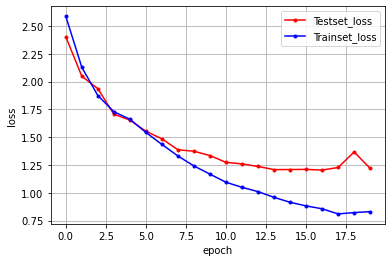

In [12]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
